<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#22.1-Hypothesis-generation-vs.-hypothesis-confirmation" data-toc-modified-id="22.1-Hypothesis-generation-vs.-hypothesis-confirmation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>22.1 Hypothesis generation vs. hypothesis confirmation</a></span></li></ul></li><li><span><a href="#23-Model-basics" data-toc-modified-id="23-Model-basics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>23 Model basics</a></span><ul class="toc-item"><li><span><a href="#23.1-Introduction" data-toc-modified-id="23.1-Introduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>23.1 Introduction</a></span></li><li><span><a href="#A-simple-model" data-toc-modified-id="A-simple-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>A simple model</a></span></li></ul></li></ul></div>

# Intro

<img src='pics/data-science-model.png' alt='Drawing' style='width:425pt'/>

The <font color = 'blue'>goal of a model is to provide a simple low-dimensional summary of a dataset</font>. Ideally, the model will capture true “signals” (i.e. patterns generated by the phenomenon of interest), and ignore “noise” (i.e. random variation that you’re not interested in). 

* Here we only cover “predictive” models, which, as the name suggests, generate predictions. 

* There is another type of model that we’re not going to discuss: “data discovery” models. These models don’t make predictions, but instead help you discover interesting relationships within your data. (These two categories of models are <font color = 'blue'>sometimes called supervised and unsupervised</font>, but I don’t think that terminology is particularly illuminating.)

This book is not going to give you a deep understanding of the mathematical theory that underlies models. It will, however, build your intuition about how statistical models work, and give you a family of useful tools that allow you to use models to better understand your data:

* In [model basics](https://r4ds.had.co.nz/model-basics.html#model-basics), you’ll learn how models work mechanistically, focussing on
    the important family of linear models. You’ll learn general tools for gaining
    insight into what a predictive model tells you about your data, focussing on
    simple simulated datasets.

* In [model building](https://r4ds.had.co.nz/model-building.html#model-building), you’ll learn how to use models to pull out known
    patterns in real data. Once you have recognised an important pattern
    it’s useful to make it explicit in a model, because then you can
    more easily see the subtler signals that remain.

* In [many models](https://r4ds.had.co.nz/many-models.html#many-models), you’ll learn how to use many simple models to help
    understand complex datasets. This is a powerful technique, but to access
    it you’ll need to combine modelling and programming tools.

These topics are notable because of what they don’t include: any tools for quantitatively assessing models. That is deliberate: precisely quantifying a model requires a couple of big ideas that we just don’t have the space to cover here. For now, you’ll rely on qualitative assessment and your natural scepticism. In [Learning more about models](https://r4ds.had.co.nz/model-building.html#learning-more-about-models), we’ll point you to other resources where you can learn more.

## 22.1 Hypothesis generation vs. hypothesis confirmation

<b><font color = 'purple'>In this book, we are going to use models as a tool for exploration </font></b>, completing the trifecta of the tools for EDA that were introduced in Part 1. This is not how models are usually taught, but as you will see, models are an important tool for exploration. <font color = 'blue'>Traditionally, the focus of modelling is on inference, or for confirming that an hypothesis is true</font>. Doing this correctly is not complicated, but it is hard. There is a pair of ideas that you must understand in order to do inference correctly:

1.  <font color = 'blue'>Each observation can either be used for <b>exploration</b> or <b>confirmation</b>,
    <font color = 'red'>not both</font>.</font>

2.  <font color = 'blue'>You can use an observation as many times as you like for exploration,
    but you can only use it once for confirmation.</font> <font color = 'red'>As soon as you use an
    observation twice, you’ve switched from confirmation to exploration</font>.

This is necessary because <font color = 'blue'>to confirm a hypothesis you must use data independent of the data</font> that you used to generate the hypothesis. Otherwise you will be over optimistic. There is absolutely nothing wrong with exploration, but you should never sell an exploratory analysis as a confirmatory analysis because it is fundamentally misleading.

If you are serious about doing an confirmatory analysis, one approach is to split your data into three pieces before you begin the analysis:

1.  <font color = 'blue'>60% of your data goes into a **training**</font> (or exploration) set. You’re
    allowed to do anything you like with this data: visualise it and fit tons
    of models to it.

2.  <font color = 'blue'>20% goes into a **query** set</font>. You can <font color = 'blue'>use this data to compare models
    or visualisations by hand, but you’re not allowed to use it as part of
    an automated process</font>.

3.  <font color = 'blue'>20% is held back for a **test** set</font>. You can only use this data ONCE, to
    test your final model.

This partitioning allows you to explore the training data, occasionally generating candidate hypotheses that you check with the query set. When you are confident you have the right model, you can check it once with the test data.

(Note that even when doing confirmatory modelling, you will still need to do EDA. If you don’t do any EDA you will remain blind to the quality problems with your data.)

# 23 Model basics

## 23.1 Introduction

In [1]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## A simple model

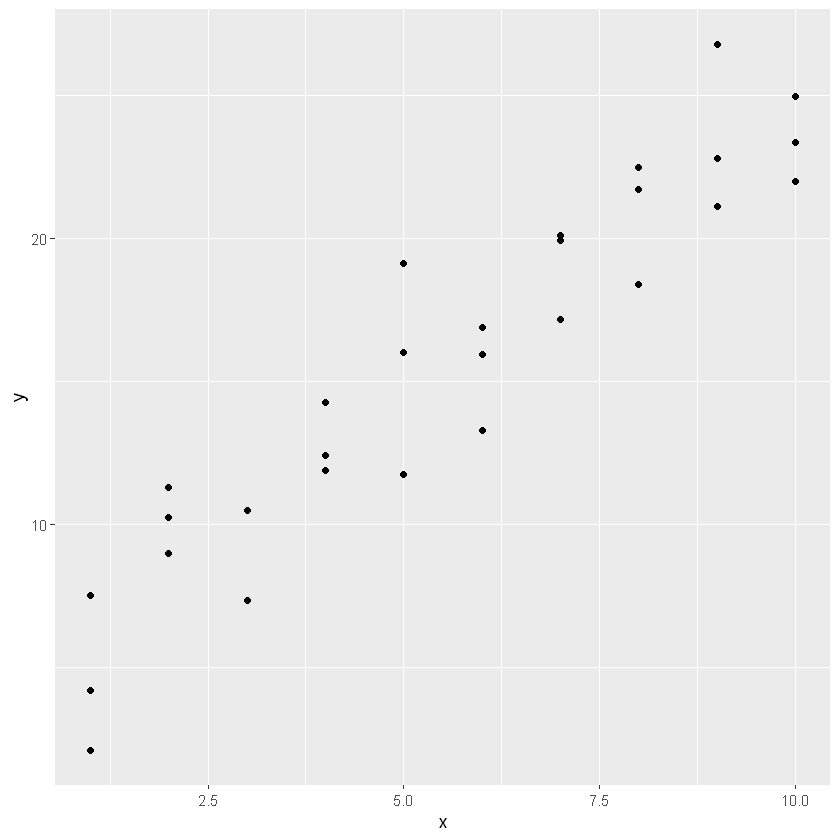

In [2]:
ggplot(sim1, aes(x, y)) + 
  geom_point()

 In this case, the relationship looks linear, i.e. `y = a_0 + a_1 * x`.

For this simple case, we can use `geom_abline()` which takes a slope and intercept as parameters.

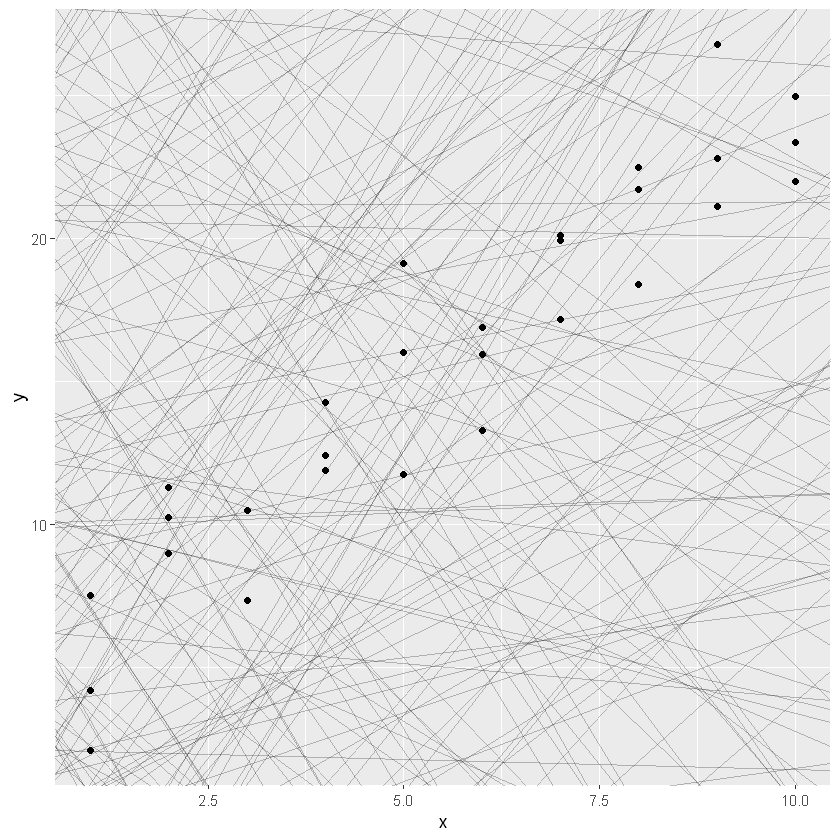

In [4]:
models <- tibble(
  a1 = runif(250, -20, 40),
  a2 = runif(250, -5, 5)
)

ggplot(sim1, aes(x, y)) + 
  geom_abline(aes(intercept = a1, slope = a2), data = models, alpha = 1/4) +
  geom_point() 

We need to find the good models by making precise our intuition that a good model is “close” to the data. We need a way to quantify the distance between the data and a model. Then we can fit the model by finding the value of a_0 and a_1 that generate the model with the smallest distance from this data.

One easy place to start is to find the vertical distance between each point and the model

<b><font color = 'purple'>To compute this distance, we first turn our model family into an R function. This takes the model parameters and the data as inputs, and gives values predicted by the model as output: </font></b>

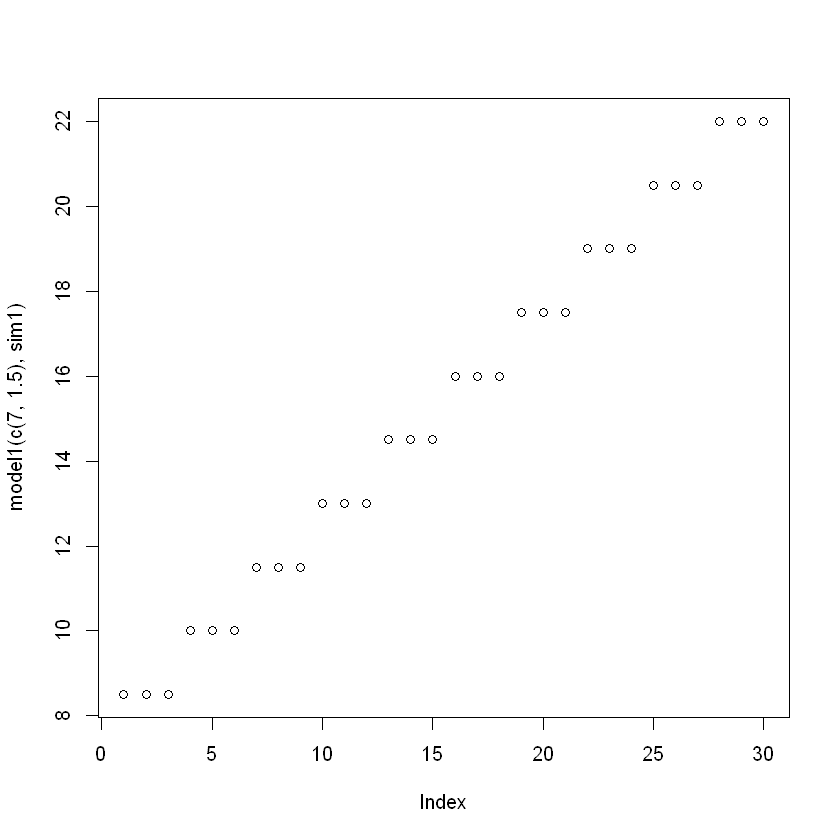

In [12]:
model1 <- function(a, data) {
  a[1] + data$x * a[2]
}
model1(c(7, 1.5), sim1)
#>  [1]  8.5  8.5  8.5 10.0 10.0 10.0 11.5 11.5 11.5 13.0 13.0 13.0 14.5 14.5 14.5
#> [16] 16.0 16.0 16.0 17.5 17.5 17.5 19.0 19.0 19.0 20.5 20.5 20.5 22.0 22.0 22.0

<b><font color = 'purple'>Next, we need some way to compute an overall distance between the predicted and actual values </font></b>. In other words, the plot above shows 30 distances: how do we collapse that into a single number?


<font color = 'blue'>One common way to do this in statistics to use the “root-mean-squared deviation”</font>

In [6]:
measure_distance <- function(mod, data) {
  diff <- data$y - model1(mod, data)
  sqrt(mean(diff ^ 2))
}

measure_distance(c(7, 1.5), sim1)
#> [1] 2.67

[1] 2.665212

In [9]:
sim1_dist <- function(a1, a2) {
  measure_distance(c(a1, a2), sim1)
}

models <- models %>% 
  mutate(dist = purrr::map2_dbl(a1, a2, sim1_dist))
models
#> # A tibble: 250 x 3
#>       a1      a2  dist
#>    <dbl>   <dbl> <dbl>
#> 1 -15.2   0.0889  30.8
#> 2  30.1  -0.827   13.2
#> 3  16.0   2.27    13.2
#> 4 -10.6   1.38    18.7
#> 5 -19.6  -1.04    41.8
#> 6   7.98  4.59    19.3
#> # … with 244 more rows

a1,a2,dist
<dbl>,<dbl>,<dbl>
27.7459731,-1.7835829,11.479799
8.6718235,-2.0322667,21.598016
-8.7195398,4.5110544,7.401351
19.6028849,-2.8573776,18.392558
-6.9155927,3.4923979,5.654348
-12.4951838,-3.8297328,51.933280
21.3722724,-3.8598455,22.995321
7.9767876,-4.8326319,39.481570
10.0110907,0.1043461,7.746512
